In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("International_Report_Departures.csv")

In [3]:
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0.0,10.0,10.0
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0.0,15.0,15.0
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0.0,1.0,1.0
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0.0,1.0,1.0
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70966,11/01/2006,2006,11,14761,SFB,33,12966,LGW,493,20444,JN,0,Departures,0.0,22.0,22.0
70967,12/01/2007,2007,12,13303,MIA,33,10575,BGI,205,20232,A2,0,Departures,0.0,1.0,1.0
70968,12/01/2006,2006,12,12878,LAF,42,11032,CUN,148,20402,GL,1,Departures,0.0,1.0,1.0
70969,06/01/2009,2009,6,11618,EWR,21,12472,JED,670,19624,SV,0,Departures,0.0,1.0,1.0


#Inspecting properties

In [4]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0.0,10.0,10.0
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0.0,15.0,15.0
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0.0,1.0,1.0
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0.0,1.0,1.0
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0.0,20.0,20.0


In [5]:
df.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [6]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70971 entries, 0 to 70970
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data_dte      70971 non-null  object 
 1   Year          70971 non-null  int64  
 2   Month         70971 non-null  int64  
 3   usg_apt_id    70971 non-null  int64  
 4   usg_apt       70971 non-null  object 
 5   usg_wac       70971 non-null  int64  
 6   fg_apt_id     70971 non-null  int64  
 7   fg_apt        70971 non-null  object 
 8   fg_wac        70971 non-null  int64  
 9   airlineid     70971 non-null  int64  
 10  carrier       70367 non-null  object 
 11  carriergroup  70971 non-null  int64  
 12  type          70971 non-null  object 
 13  Scheduled     70970 non-null  float64
 14  Charter       70970 non-null  float64
 15  Total         70970 non-null  float64
dtypes: float64(3), int64(8), object(5)
memory usage: 8.7+ MB


In [7]:
#change the data type for data_dte and carriergroup
df['data_dte'] = pd.to_datetime(df['data_dte'])
df['carriergroup'] = df.carriergroup.astype('category')

In [8]:
df.dtypes

data_dte        datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id                int64
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup          category
type                    object
Scheduled              float64
Charter                float64
Total                  float64
dtype: object

In [9]:
# calculate the statistical analytics
df.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,Scheduled,Charter,Total
count,70971.000000,70971.000000,70971.000000,70971.000000,70971.000000,70971.00000,70971.000000,70970.0,70970.000000,70970.000000
mean,2005.590297,6.407504,13057.784574,40.002114,13623.784278,464.19012,20245.973933,0.0,7.008680,7.008680
std,2.770632,3.484302,4676.882030,24.582925,1912.793443,295.90834,302.713904,0.0,13.098276,13.098276
min,2001.000000,1.000000,10135.000000,1.000000,10119.000000,106.00000,19386.000000,0.0,1.000000,1.000000
25%,2003.000000,3.000000,11540.000000,22.000000,11928.000000,204.00000,20095.000000,0.0,1.000000,1.000000
50%,2006.000000,6.000000,13061.000000,33.000000,13605.000000,409.00000,20266.000000,0.0,2.000000,2.000000
75%,2008.000000,9.000000,13898.000000,52.000000,15210.000000,736.00000,20402.000000,0.0,8.000000,8.000000
max,2010.000000,12.000000,99999.000000,93.000000,16477.000000,975.00000,21569.000000,0.0,266.000000,266.000000


In [10]:
# number row and columns
df.shape

(70971, 16)

##Data pre-processing

In [15]:
# identitfy the missing value
df.isna().sum

data_dte          0
Year              0
Month             0
usg_apt_id        0
usg_apt           0
usg_wac           0
fg_apt_id         0
fg_apt            0
fg_wac            0
airlineid         0
carrier         604
carriergroup      0
type              0
Scheduled         1
Charter           1
Total             1
dtype: int64

In [16]:
df[df.isna().values]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
21,2005-06-01,2005,6,12478,JFK,22,12991,LIS,469,20415,NaN,1,Departures,0.0,1.0,1.0
37,2006-11-01,2006,11,12478,JFK,22,14210,POS,280,20415,NaN,1,Departures,0.0,10.0,10.0
255,2009-07-01,2009,7,15070,SWF,22,12957,LGG,409,20415,NaN,1,Departures,0.0,1.0,1.0
267,2006-01-01,2006,1,12478,JFK,22,15115,TAB,280,20415,NaN,1,Departures,0.0,2.0,2.0
318,2006-01-01,2006,1,11697,FLL,33,14210,POS,280,20415,NaN,1,Departures,0.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70790,2007-11-01,2007,11,12478,JFK,22,11032,CUN,148,20415,NaN,1,Departures,0.0,3.0,3.0
70957,2005-09-01,2005,9,12478,JFK,22,11518,EIN,461,20415,NaN,1,Departures,0.0,1.0,1.0
70970,2006-09-01,2006,9,14761,SFB,33,12966,LGW,493,20375,TZQ,0,Departures,NaN,NaN,NaN
70970,2006-09-01,2006,9,14761,SFB,33,12966,LGW,493,20375,TZQ,0,Departures,NaN,NaN,NaN


In [17]:
df.isna().any()

data_dte        False
Year            False
Month           False
usg_apt_id      False
usg_apt         False
usg_wac         False
fg_apt_id       False
fg_apt          False
fg_wac          False
airlineid       False
carrier          True
carriergroup    False
type            False
Scheduled        True
Charter          True
Total            True
dtype: bool

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: >

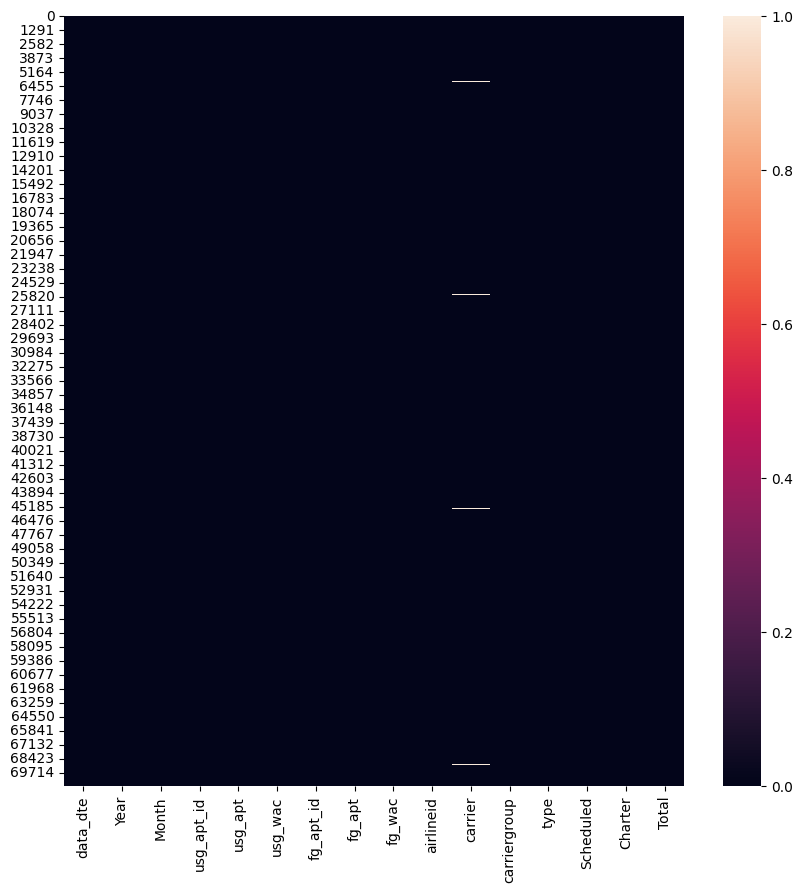

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [20]:
df1=df.dropna()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70366 entries, 0 to 70969
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_dte      70366 non-null  datetime64[ns]
 1   Year          70366 non-null  int64         
 2   Month         70366 non-null  int64         
 3   usg_apt_id    70366 non-null  int64         
 4   usg_apt       70366 non-null  object        
 5   usg_wac       70366 non-null  int64         
 6   fg_apt_id     70366 non-null  int64         
 7   fg_apt        70366 non-null  object        
 8   fg_wac        70366 non-null  int64         
 9   airlineid     70366 non-null  int64         
 10  carrier       70366 non-null  object        
 11  carriergroup  70366 non-null  category      
 12  type          70366 non-null  object        
 13  Scheduled     70366 non-null  float64       
 14  Charter       70366 non-null  float64       
 15  Total         70366 non-null  float6

##EDA

Year
2001    Axes(0.125,0.11;0.775x0.77)
2002    Axes(0.125,0.11;0.775x0.77)
2003    Axes(0.125,0.11;0.775x0.77)
2004    Axes(0.125,0.11;0.775x0.77)
2005    Axes(0.125,0.11;0.775x0.77)
2006    Axes(0.125,0.11;0.775x0.77)
2007    Axes(0.125,0.11;0.775x0.77)
2008    Axes(0.125,0.11;0.775x0.77)
2009    Axes(0.125,0.11;0.775x0.77)
2010    Axes(0.125,0.11;0.775x0.77)
Name: Total, dtype: object

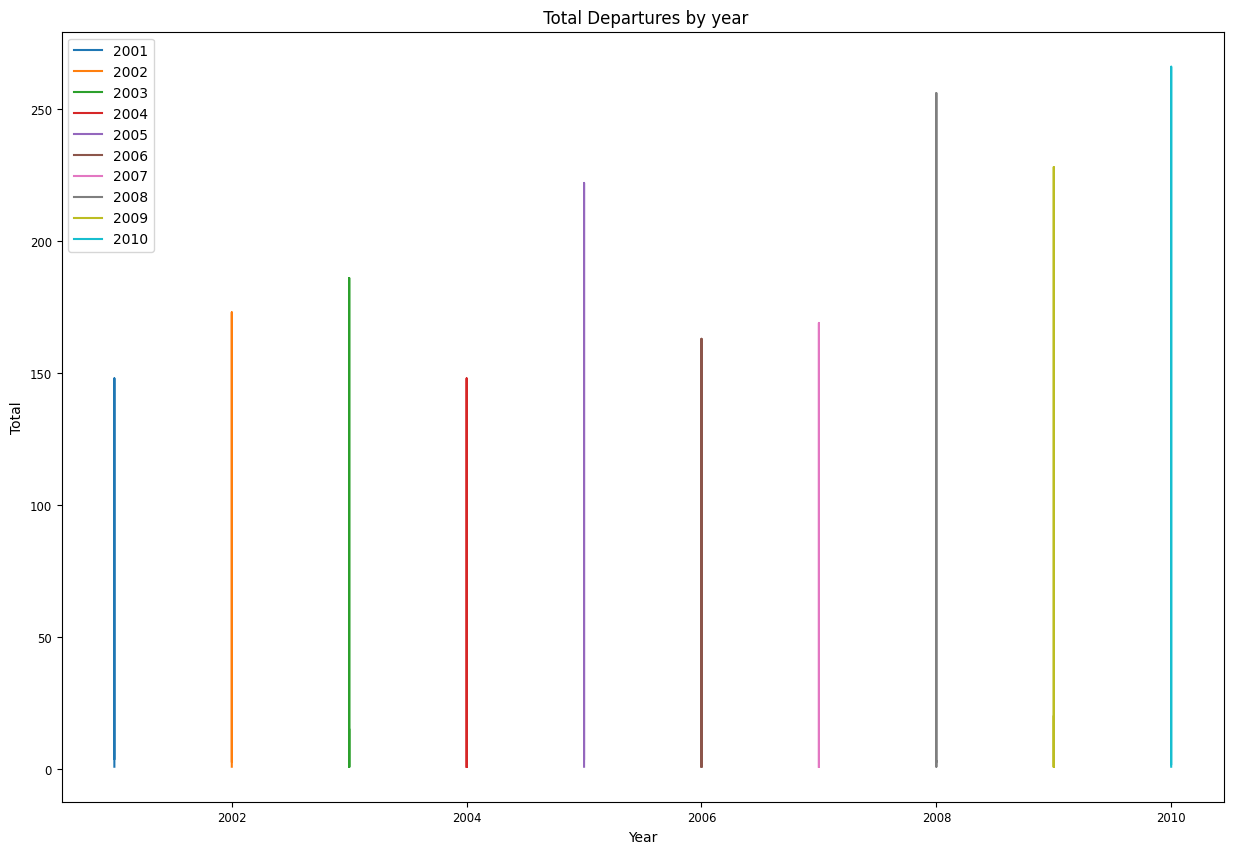

In [22]:
#define index column
df1.set_index('Year', inplace=True)

#group data by Year and display  Total Departures de as line chart
df1.groupby('Year')['Total'].plot(legend=True,fontsize='small',figsize=(15, 10), title=" Total Departures by year",ylabel= ("Total")
)


In [23]:
count=df1['carrier'].value_counts()

In [24]:
count = pd.DataFrame(count)
top_5=count.head()

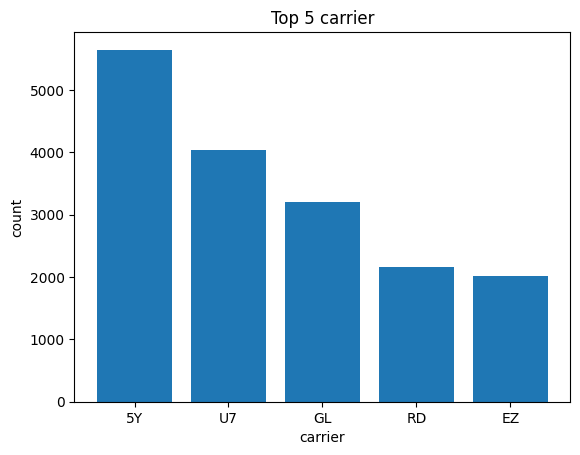

In [25]:
plt.bar(top_5.T.columns,top_5["carrier"])
plt.title("Top 5 carrier")
plt.ylabel("count")
plt.xlabel("carrier")
plt.show()

In [26]:
import plotly.express as px


In [27]:
departures_box = px.box(
    df1, # dataframe input
    y="Total", # Total departures
    x="Month", # months
    color="Month", # color by  months
    title="Box Plot for departures with months ",
    points="all",
    width=1500

)
# show plot
departures_box.show()

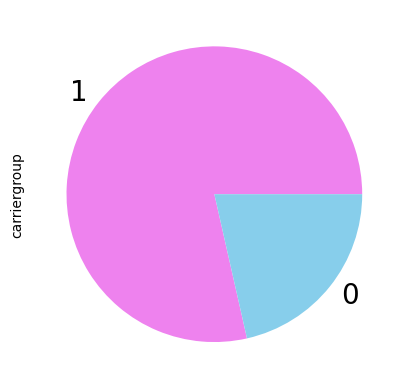

In [43]:
p1=df1['carriergroup'].value_counts().plot(kind='pie',textprops={'fontsize': 20},
                                 colors=['violet', 'skyblue'])
plt.show()